In [56]:
import nltk
from nltk.corpus import gutenberg, stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import sent_tokenize

# TOP TWENTY WORDS

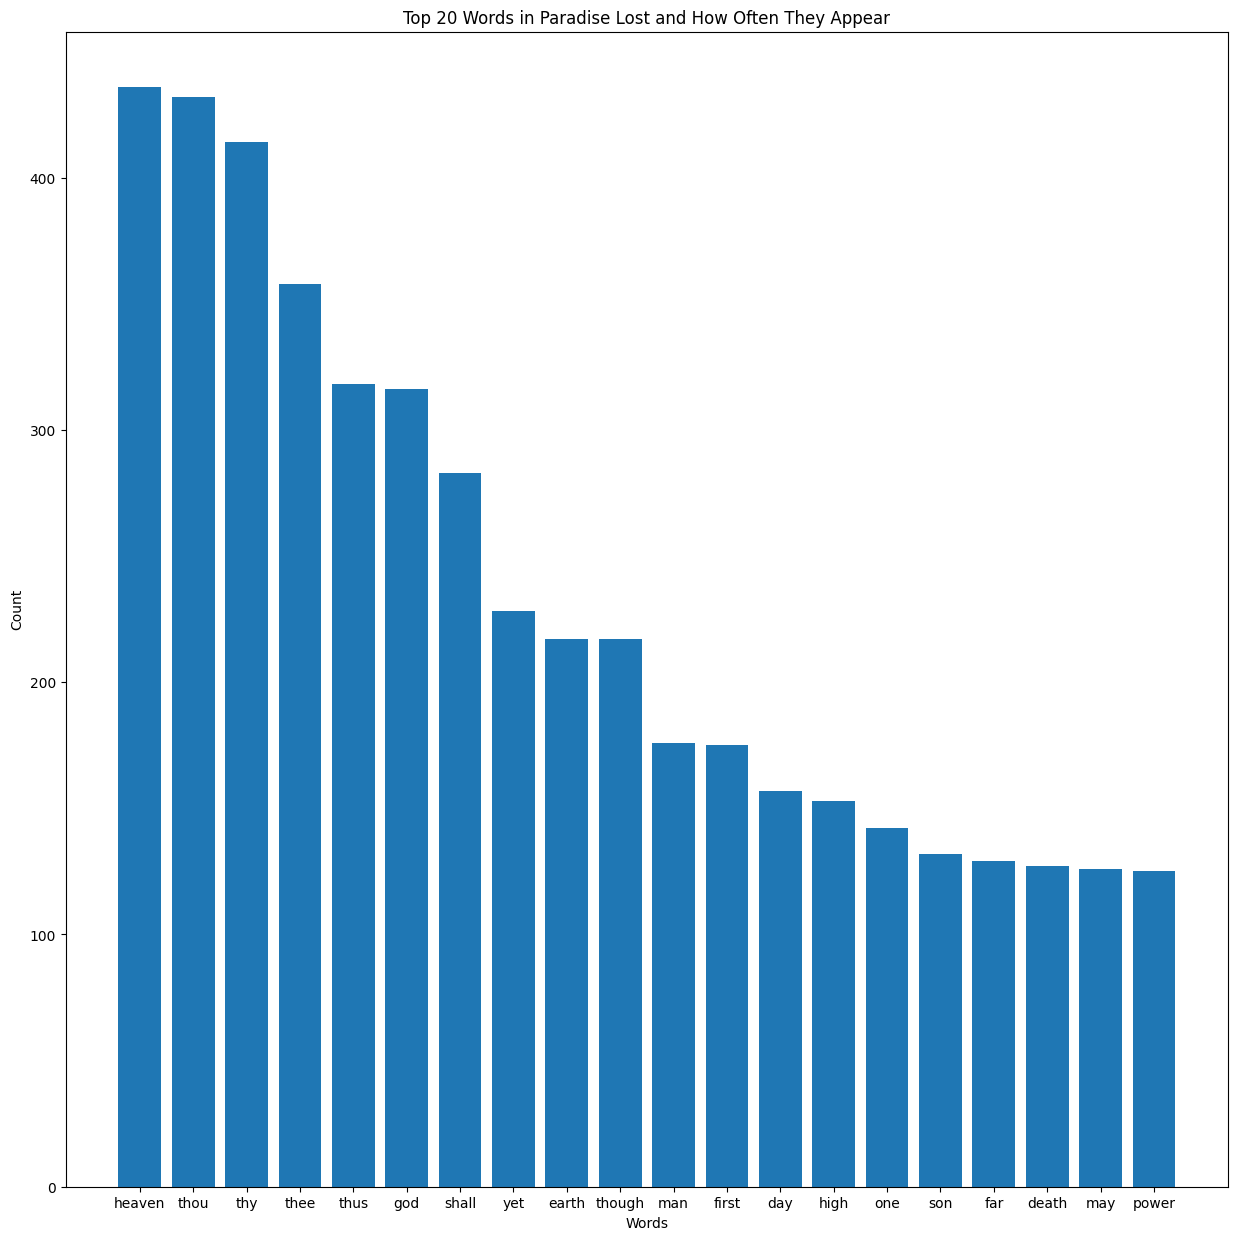

In [57]:
# Read in and process Paradise Lost
def milton_paradise():

    words = gutenberg.words('milton-paradise.txt') # Get every word from the gutenberg

    lemm = WordNetLemmatizer() # Lemmatize
    stopwords_list = set(stopwords.words('english')) # Get the stopwords

    # Exclude meaningless words, single letters, and stop words.
    lemmWords = {}
    for word in words:
        word = word.lower()
        if len(word) > 2 and word not in stopwords_list:
            word = lemm.lemmatize(word)

            # Check if word is already in the dictionary
            if word in lemmWords:
                lemmWords[word] += 1  # Increment the count
            else:
                lemmWords[word] = 1  # Otherwise, set it to 1 (first occurrence of word)

    # Sort by frequency
    topTwenty = list(lemmWords.items())
    for i in range(len(topTwenty)):
        for j in range(i + 1, len(topTwenty)):
            if topTwenty[i][1] < topTwenty[j][1]:  # Compare frequency (second element)
                topTwenty[i], topTwenty[j] = topTwenty[j], topTwenty[i]  # Swap if out of order

    return topTwenty[:20] # Just return the top twenty entries (first twenty once sorted)

topTwentyWords = milton_paradise()

words, counts = zip(*topTwentyWords) # Through research, I found out how to unfurl the dictionary into two lists: words and their counts.

plt.figure(figsize = (15, 15))
plt.bar(words, counts)
plt.title('Top 20 Words in Paradise Lost and How Often They Appear')
plt.ylabel('Count')
plt.xlabel('Words')
plt.show()

As discussed in class, lemmatization is a more elaborate, modernized version of stemming; whereas stemming archaically axes the ends of words, lemmatization adapts dynamically to suffixes in context, providing a more accurate connection between a word and its base root (fish/fishing being the obvious class example).

# VADER SENTIMENT ANALYSIS

In [58]:
def vaderAnalysis():
    
    # No sentence tokenizer for this corpus! I'll have to manually tokenize each sentence for the whole text by joining it as a single string
    fullText = ' '.join(gutenberg.words('milton-paradise.txt'))
    tokenSentences = []

    for sent in fullText:
        sentence = ' '.join(sent).strip()
        tokenSentences.append(sentence)

    sAnalyzer = SentimentIntensityAnalyzer() # Instantiate a sentiment analyzer

    posSent = [] # Create a list that stores every positive sentence
    negSent = [] # Create a list for the negative sentences
    neuSent = [] # And a last one for the neutral sentences

    for sent in tokenSentences: # Loop through every tokenized sentence in Paradise Lost
        polarityScore = sAnalyzer.polarity_scores(sent) 
        compScore = polarityScore['compound']

        # Compound score ranges from -1 to 1, the former being etremely negative to the latter being extremely positive
        if compScore > 0.8: # If the compound score for the sentence was found to be relatively positive...
            posSent.append((sent, compScore)) # Adding the compound score here in a tuple is necessary for sorting later
        elif compScore < -0.8: #
            negSent.append((sent, compScore))
        elif -0.5 <= compScore <= 0.5:
            neuSent.append((sent, compScore))

        # Sort positive sentences
    for i in range(len(posSent)):
        for j in range(i + 1, len(posSent)):
            if posSent[i][1] < posSent[j][1]:  # Compare compound score (second element)
                posSent[i], posSent[j] = posSent[j], posSent[i]  # Swap if out of order

    # Sort negative sentences
    for i in range(len(negSent)):
        for j in range(i + 1, len(negSent)):
            if negSent[i][1] < negSent[j][1]:  # Compare compound score (second element)
                negSent[i], negSent[j] = negSent[j], negSent[i]  # Swap if out of order

    # Sort neutral sentences
    for i in range(len(neuSent)):
        for j in range(i + 1, len(neuSent)):
            if neuSent[i][1] < neuSent[j][1]:  # Compare compound score (second element)
                neuSent[i], neuSent[j] = neuSent[j], neuSent[i]  # Swap if out of order

    return posSent, negSent, neuSent  # Return sorted sentences

posSent, negSent, neuSent = vaderAnalysis()
print(f"Top 5 Positive Sentences: {posSent[:5]}") # Top 5 after sorting
print(f"Top 5 Negative Sentences: {negSent[:5]}") # Top 5 after sorting
print(f"Top 5 Neutral Sentences: {neuSent[:5]}") # Top 5 after sorting

KeyboardInterrupt: 

After running a preliminary trial on the first quarter or so of the book, it seems as though sentiment analysis fails when tackling complex literary works such as Paradise Lost. A sprawling sentence structure often means that puncutation is inconsistently tokenized, making sentiment analysis all the more complicated. Furthermore, turns of phrase and antiquated vernacular seem to confuse the model, as a description of heaven as an impossible place, irreverably impossible to reach seems negative at face value, but is characterized by Vader as positive due to the positive imagery associated with heaven.